In [5]:
from ultralytics import YOLO
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#model = YOLO("/home/madusov/sber/runs/detect/train32/weights/last.pt").to(device)
model = YOLO("yolo11m.pt").to(device)

In [2]:
device

device(type='cuda')

In [3]:
from ultralytics.data.augment import Albumentations
from ultralytics.utils import LOGGER, colorstr

def __init__(self, p=1.0):
        """Initialize the transform object for YOLO bbox formatted params."""
        self.p = p
        self.transform = None
        prefix = colorstr("albumentations: ")
        try:
            import albumentations as A         

            # Insert required transformation here
            T = [
                A.RandomSizedBBoxSafeCrop(640, 640, erosion_rate=0.6)
            ]
            self.transform = A.Compose(T, bbox_params=A.BboxParams(format="yolo", label_fields=["class_labels"]))

            LOGGER.info(prefix + ", ".join(f"{x}".replace("always_apply=False, ", "") for x in T if x.p))
        except ImportError:  # package not installed, skip
            pass
        except Exception as e:
            LOGGER.info(f"{prefix}{e}")

Albumentations.__init__ = __init__


In [16]:

    def __init__(self, p=1.0):
        """
        Initialize the Albumentations transform object for YOLO bbox formatted parameters.

        This class applies various image augmentations using the Albumentations library, including Blur, Median Blur,
        conversion to grayscale, Contrast Limited Adaptive Histogram Equalization, random changes of brightness and
        contrast, RandomGamma, and image quality reduction through compression.

        Args:
            p (float): Probability of applying the augmentations. Must be between 0 and 1.

        Attributes:
            p (float): Probability of applying the augmentations.
            transform (albumentations.Compose): Composed Albumentations transforms.
            contains_spatial (bool): Indicates if the transforms include spatial transformations.

        Raises:
            ImportError: If the Albumentations package is not installed.
            Exception: For any other errors during initialization.

        Examples:
            >>> transform = Albumentations(p=0.5)
            >>> augmented = transform(image=image, bboxes=bboxes, class_labels=classes)
            >>> augmented_image = augmented["image"]
            >>> augmented_bboxes = augmented["bboxes"]

        Notes:
            - Requires Albumentations version 1.0.3 or higher.
            - Spatial transforms are handled differently to ensure bbox compatibility.
            - Some transforms are applied with very low probability (0.01) by default.
        """
        self.p = p
        self.transform = None
        prefix = colorstr("albumentations: ")

        try:
            import albumentations as A

            #check_version(A.__version__, "1.0.3", hard=True)  # version requirement

            # List of possible spatial transforms
            spatial_transforms = {
                "Affine",
                "BBoxSafeRandomCrop",
                "CenterCrop",
                "CoarseDropout",
                "Crop",
                "CropAndPad",
                "CropNonEmptyMaskIfExists",
                "D4",
                "ElasticTransform",
                "Flip",
                "GridDistortion",
                "GridDropout",
                "HorizontalFlip",
                "Lambda",
                "LongestMaxSize",
                "MaskDropout",
                "MixUp",
                "Morphological",
                "NoOp",
                "OpticalDistortion",
                "PadIfNeeded",
                "Perspective",
                "PiecewiseAffine",
                "PixelDropout",
                "RandomCrop",
                "RandomCropFromBorders",
                "RandomGridShuffle",
                "RandomResizedCrop",
                "RandomRotate90",
                "RandomScale",
                "RandomSizedBBoxSafeCrop",
                "RandomSizedCrop",
                "Resize",
                "Rotate",
                "SafeRotate",
                "ShiftScaleRotate",
                "SmallestMaxSize",
                "Transpose",
                "VerticalFlip",
                "XYMasking",
            }  # from https://albumentations.ai/docs/getting_started/transforms_and_targets/#spatial-level-transforms

            # Transforms
            T = [
                #A.RandomSizedBBoxSafeCrop(640, 640, erosion_rate=0.6)
                A.Crop(x_min=639, y_min=639, x_max=640, y_max=640, p=1.0)
            ]

            # Compose transforms
            self.contains_spatial = any(transform.__class__.__name__ in spatial_transforms for transform in T)
            self.transform = (
                A.Compose(T, bbox_params=A.BboxParams(format="yolo", label_fields=["class_labels"]))
                if self.contains_spatial
                else A.Compose(T)
            )
            LOGGER.info(prefix + ", ".join(f"{x}".replace("always_apply=False, ", "") for x in T if x.p))
        except ImportError:  # package not installed, skip
            pass
        except Exception as e:
            LOGGER.info(f"{prefix}{e}")

In [17]:
Albumentations.__init__ = __init__


In [ ]:
results = model.train(data="y.yaml", imgsz=1024, epochs=20, single_cls=True, batch=24, workers=4, resume=True)

engine/trainer: task=detect, mode=train, model=/home/madusov/sber/runs/detect/train32/weights/last.pt, data=y.yaml, epochs=20, time=None, patience=100, batch=24, imgsz=1024, save=True, save_period=-1, cache=False, device=cuda:0, workers=4, project=None, name=train32, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=/home/madusov/sber/runs/detect/train32/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

train: Scanning /home/madusov/sber/data_yolo/labels/train.cache... 42750 images, 2516 backgrounds, 0 corrupt: 100%|██████████| 42750/42750 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/home/madusov/.conda/envs/yolov11/lib/python3.12/site-packages/albumentations/check_version.py:49: UserWarning: Error fetching version info <urlopen error [Errno 101] Network is unreachable>
  data = fetch_version_info()
val: Scanning /home/madusov/sber/data_yolo/labels/val.cache... 43500 images, 3061 backgrounds, 0 corrupt: 100%|██████████| 43500/43500 [00:00<?, ?it/s]
/home/madusov/.conda/envs/yolov11/lib/python3.12/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Plotting labels to runs/detect/train32/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005625000000000001), 112 bias(decay=0.0)
Resuming training /home/madusov/sber/runs/detect/train32/weights/last.pt from epoch 6 to 20 total epochs
Image sizes 1024 train, 1024 val
Using 4 dataloader workers
Logging results to runs/detect/train32
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      32.5G      2.199      1.327      0.859         41       1024:   7%|▋         | 120/1782 [01:29<20:01,  1.38it/s]

In [6]:
results = model.train(data="data_yolo_sahi_train/dataset.yaml", epochs=20, single_cls=True, batch=64, workers=4)

engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=data_yolo_sahi_train/dataset.yaml, epochs=20, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=4, project=None, name=train39, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False,

train: Scanning /home/madusov/sber/data_yolo_sahi_train/labels/train.cache... 230877 images, 173198 backgrounds, 0 corrupt: 100%|██████████| 230877/230877 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /home/madusov/sber/data_yolo_sahi_train/labels/val.cache... 23707 images, 17690 backgrounds, 1 corrupt: 100%|██████████| 23708/23708 [00:00<?, ?it/s]

val: WARNING ⚠️ /home/madusov/sber/data_yolo_sahi_train/images/val/1107000209_21208_640_0_1280_640.png: ignoring corrupt image/label: cannot identify image file '/home/madusov/sber/data_yolo_sahi_train/images/val/1107000209_21208_640_0_1280_640.png'



/home/madusov/.conda/envs/yolov11/lib/python3.12/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Plotting labels to runs/detect/train39/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train39
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      32.2G      2.278      2.188      0.998         10        640: 100%|██████████| 3608/3608 [46:48<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [02:19<00:00,  1.34it/s]


                   all      23707       6062      0.715      0.595       0.59      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20        32G      2.359      1.647      1.005          5        640: 100%|██████████| 3608/3608 [46:14<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [02:03<00:00,  1.50it/s]


                   all      23707       6062      0.711      0.588      0.594      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20        32G      2.386      1.718      1.017          8        640: 100%|██████████| 3608/3608 [46:18<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [02:06<00:00,  1.47it/s]

                   all      23707       6062      0.717      0.612      0.616      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20        32G      2.337      1.638      1.008          8        640: 100%|██████████| 3608/3608 [46:15<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [02:05<00:00,  1.49it/s]


                   all      23707       6062      0.724      0.637      0.643      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20        32G      2.248       1.53     0.9864         24        640:  60%|██████    | 2168/3608 [27:45<18:26,  1.30it/s]


KeyboardInterrupt: 

In [6]:
results = model(['/home/madusov/sber/data_yolo/images/val/2021000177.jpg'])


0: 576x1024 1 ball, 14.6ms
Speed: 7.4ms preprocess, 14.6ms inference, 640.7ms postprocess per image at shape (1, 3, 576, 1024)


In [75]:
from PIL import Image
import cv2
import numpy as np
from ultralytics.utils.plotting import Annotator

image = Image.open('/home/madusov/sber/data_yolo/images/val/2081000364.jpg')
#image = cv2.imread('/home/madusov/sber/data_yolo/images/val/2021000177.jpg')
#image = cv2.imread('/home/madusov/sber/data_yolo/images/val/2081000157.jpg')


results = model(image)

for res in results:
    annotator = Annotator(image)
    for box in res.boxes:
        b = box.xyxy[0]  
        c = box.cls
        annotator.box_label(b, model.names[int(c)])
        
image = annotator.result()  


0: 576x1024 (no detections), 14.8ms
Speed: 7.4ms preprocess, 14.8ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


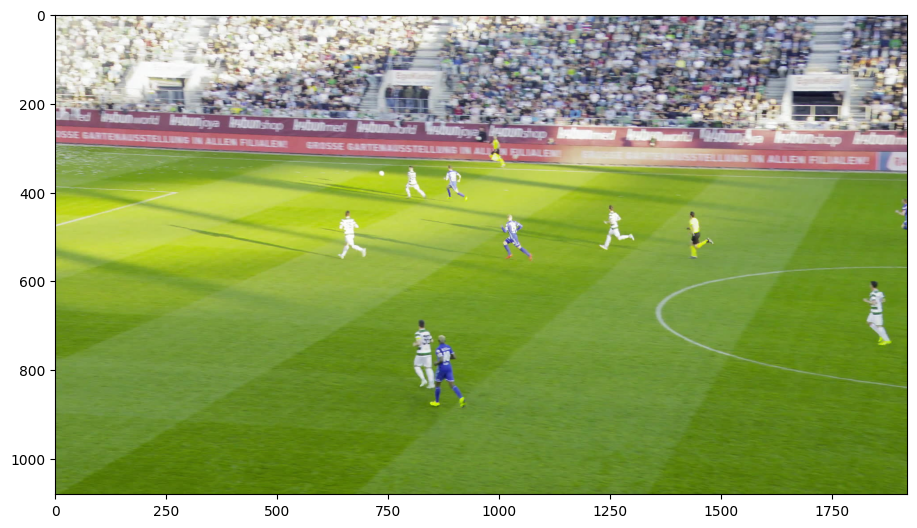

In [76]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11, 10))
ax.imshow(image)

In [ ]:
import cv2
from ultralytics import YOLO
from tqdm import tqdm
import os

# Load the YOLOv8 model
# model = YOLO('yolov8n.pt')          ### Pre-trained weights

model = YOLO("/home/madusov/sber/runs/detect/train32/weights/last.pt")

path_images = '/home/madusov/sber/data/SoccerNetGS/train/SNGS-063/img1'

video=cv2.VideoWriter('filename.avi',  
                      cv2.VideoWriter_fourcc(*'MJPG'), 
                      30, (1920, 1080)) 

for image_name in tqdm(sorted(os.listdir(path_images))[:100]):
        frame = cv2.imread(os.path.join(path_images, image_name))

        results = model.track(frame, persist=True, tracker="botsort.yaml")

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        video.write(annotated_frame)
        
video.release()